<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/main/alexeigrebnyov/DatasetParsedRFpred_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Библиотека работы с массивами
import numpy as np

# Библиотека для работы с таблицами
import pandas as pd

# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Слой задания активационной функции <----- !!!
from tensorflow.keras.layers import Activation

# Утилиты предобработки данных
from tensorflow.keras import utils

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split

# Рисование графиков
import matplotlib.pyplot as plt
import statistics
import re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
import os
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from scipy import stats

%matplotlib inline

In [12]:
# Загрузка датасета
! gdown --id 1AW7RKH03Ol0y_9eKiNjdi73b22j-bw1_


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AW7RKH03Ol0y_9eKiNjdi73b22j-bw1_
To: /content/df_flxl.xlsx
100% 10.0M/10.0M [00:00<00:00, 140MB/s]


In [13]:
#загружаем предварительно обработанный датасет
df_CAT=pd.read_excel('df_flxl.xlsx')
df_CAT

,Unnamed: 0,КлиентПол,ТипМедосмотра,ПсихОсвидетельствование,Цех,Профессия,ЗаключениеМК,Заключение,ДиспансернаяГруппа,ВредныеФакторы,...,Оториноларингология3_СВысыпаниями_Значение,Оториноларингология3_НебныеМиндалины1_Значение,Оториноларингология3_НебныеМиндалины2_Значение,Оториноларингология3_ВестибулярныйАнализатор1_Значение,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология1_ЖалобыДополнение_Значение,Стоматология2_ВП2_Значение,Терапия2_ЗаключениеФОГК_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,dateDiff
0,0,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,45
1,1,2,1,0,1,2,1,1,2,2,...,1,1,1,1,1,1,1,1,1,34
2,2,2,1,0,1,3,2,2,3,2,...,1,1,1,1,1,1,1,1,1,36
3,3,2,1,0,2,4,1,1,1,3,...,1,1,1,1,1,1,1,1,1,33
4,4,2,1,0,3,5,2,2,3,3,...,1,1,1,1,1,1,1,1,1,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,1977,2,1,0,1,688,7,9,5,294,...,1,1,1,1,1,1,1,1,1,50
1978,1978,2,1,0,1,689,7,9,5,294,...,1,1,1,1,1,1,1,1,1,36
1979,1979,2,1,0,1,144,7,9,5,455,...,1,1,1,1,1,1,1,1,1,28
1980,1980,1,1,0,1,91,7,9,5,17,...,1,1,1,1,1,1,1,1,1,50


In [14]:
#даем доступ блокноту к диску
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


копируем и "доочищаем" датасет



In [15]:

df_fl=df_CAT.copy()

In [16]:
df_fl=df_fl.drop(df_fl.columns[0], axis=1).reset_index(drop=True)

In [17]:
df_fl=df_fl.drop(df_fl[df_fl['dateDiff']==0].index).reset_index(drop=True)
df_fl

,КлиентПол,ТипМедосмотра,ПсихОсвидетельствование,Цех,Профессия,ЗаключениеМК,Заключение,ДиспансернаяГруппа,ВредныеФакторы,ЛабораторныеИсследования1_Салон,...,Оториноларингология3_СВысыпаниями_Значение,Оториноларингология3_НебныеМиндалины1_Значение,Оториноларингология3_НебныеМиндалины2_Значение,Оториноларингология3_ВестибулярныйАнализатор1_Значение,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология1_ЖалобыДополнение_Значение,Стоматология2_ВП2_Значение,Терапия2_ЗаключениеФОГК_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,dateDiff
0,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,45
1,2,1,0,1,2,1,1,2,2,1,...,1,1,1,1,1,1,1,1,1,34
2,2,1,0,1,3,2,2,3,2,1,...,1,1,1,1,1,1,1,1,1,36
3,2,1,0,2,4,1,1,1,3,1,...,1,1,1,1,1,1,1,1,1,33
4,2,1,0,3,5,2,2,3,3,1,...,1,1,1,1,1,1,1,1,1,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,2,1,0,1,688,7,9,5,294,2,...,1,1,1,1,1,1,1,1,1,50
1978,2,1,0,1,689,7,9,5,294,2,...,1,1,1,1,1,1,1,1,1,36
1979,2,1,0,1,144,7,9,5,455,3,...,1,1,1,1,1,1,1,1,1,28
1980,1,1,0,1,91,7,9,5,17,3,...,1,1,1,1,1,1,1,1,1,50


In [18]:
x=df_fl.drop(columns=['Заключение']).reset_index(drop=True)
y=df_fl['Заключение']
x, y

(      КлиентПол  ТипМедосмотра  ПсихОсвидетельствование  Цех  Профессия  \
 0             1              1                        0    1          1   
 1             2              1                        0    1          2   
 2             2              1                        0    1          3   
 3             2              1                        0    2          4   
 4             2              1                        0    3          5   
 ...         ...            ...                      ...  ...        ...   
 1977          2              1                        0    1        688   
 1978          2              1                        0    1        689   
 1979          2              1                        0    1        144   
 1980          1              1                        0    1         91   
 1981          2              1                        0    1        690   
 
       ЗаключениеМК  ДиспансернаяГруппа  ВредныеФакторы  \
 0                1        

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

In [20]:
# Получение списка значений разницы между y_test и pred
def test_pred_diff_plot(test, pred, method):
    l_dl=[]
    print(method)
    for i in range(0, len(test)):
        print(test[i],pred[i], sep=' ')
        dif=(abs(test[i]-pred[i])/test[i])*100
        if dif != float("inf"):
            l_dl.append(dif)
    return l_dl

In [21]:
#функция для создания и сохранения ml-моделей
def ml_method_estim(method_list,  x_train, x_test, y_train, y_test):

#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

    y_train=np.reshape(y_train.values, (-1,1))
    y_test=np.reshape(y_test.values, (-1,1))

    methods=[]
    MAE_list=[]
    R_2_list=[]
    MSE_list=[]
    acc_list=[]
    diff_list=[]
    valscore_list=[]
    plots=[]
    namecount=0
    for i in method_list:
      
        model=i.fit(x_train, y_train)
        p1=model.predict(x_test)

        mae=mean_absolute_error(y_test, p1)
        r2=r2_score(y_test, p1)
        mse=mean_squared_error(y_test, p1)
        acc=accuracy_score(y_test, p1.round())


        fold = KFold(n_splits=6, shuffle=True, random_state=5)
        # scores = cross_val_score(estimator = model,X=x_train_scaled, y=y_train_scaled,cv=fold)
        scores = cross_val_score(estimator = model,X=x_train, y=y_train,cv=fold)


        methods.append(str(i))
        MAE_list.append(mae)
        R_2_list.append(r2)
        MSE_list.append(mse)
        acc_list.append(acc)
        valscore_list.append(scores.mean())

        diff=test_pred_diff_plot(y_test, p1, i)
        plots.append(diff)
        diff_list.append(sum(diff)/len(y_test))
        filename = '/content/drive/MyDrive/aimodels/model_ML_Pro'+str(namecount)+'.sav'
        pickle.dump(model, open(filename, 'wb'))
        namecount+=1

    method_col=pd.Series(methods)
    mae_col=pd.Series(MAE_list)
    r_2_col=pd.Series(R_2_list)
    mse_col=pd.Series(MSE_list)
    acc_col=pd.Series(acc_list)
    valscore_col=pd.Series(valscore_list)
    estim_df=pd.DataFrame({'method':method_col, 'mae':mae_col, 'r_2':r_2_col, 'mse':mse_col, 'accuracy': acc_col, 'mean_diff(%)':diff_list, 'mean_val_score':valscore_col})

    count=0
    for k in plots:
        plt.plot(k, label=str(count))
        count+=1
    plt.legend()
    plt.title('Величина различий реальных и предсказанных значений в % в зависимости от методики')
    plt.show()


    return estim_df


LinearRegression()
[1] [1.02099609]
[9] [9.02526855]
[1] [0.96044922]
[2] [1.92858887]
[1] [-1.24963379]
[1] [0.86743164]
[1] [1.15551758]
[1] [0.76220703]
[9] [8.64611816]
[1] [0.09326172]
[1] [1.83886719]
[1] [0.99743652]
[1] [0.56689453]
[1] [0.94262695]
[1] [1.07751465]
[1] [1.00952148]
[9] [8.96862793]
[1] [0.88342285]
[5] [4.67272949]
[1] [0.98864746]
[1] [8.96801758]
[1] [1.07141113]
[1] [1.06713867]
[1] [-2.73520951e+09]
[9] [9.01098633]
[1] [6.09748396e+08]
[1] [1.0592041]
[1] [8.96020508]
[2] [2.58215332]
[1] [1.85046387]
[1] [1.09375]
[1] [0.85229492]
[1] [1.09436035]
[1] [1.03955078]
[1] [0.65576172]
[9] [9.01525879]
[2] [-5.94177127e+10]
[1] [1.00891113]
[1] [1.80541992]
[1] [0.98608398]
[9] [9.36572266]
[2] [2.00463867]
[1] [1.21142578]
[1] [1.02978516]
[9] [8.54785156]
[1] [0.81213379]
[1] [1.09069824]
[1] [0.76086426]
[1] [0.91394043]
[1] [8.52160645]
[1] [1.74084473]
[1] [1.8380127]
[1] [0.98144531]
[1] [0.86523438]
[1] [0.94555664]
[9] [9.10046387]
[1] [0.94165039]
[1

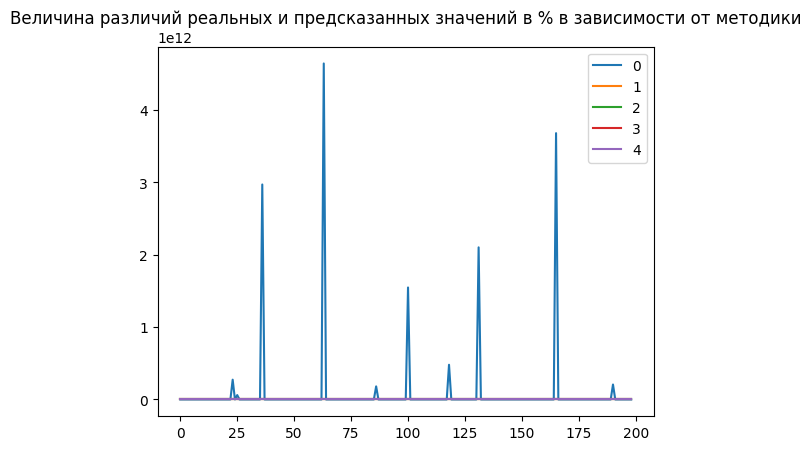

,method,mae,r_2,mse,accuracy,mean_diff(%),mean_val_score
0,LinearRegression(),1.033575e+09,-4.033240e+18,4.032059e+19,0.814070,[81137391503.83032],-2.827841e+19
1,"KNeighborsRegressor(metric='euclidean', n_neig...",1.934673e+00,1.705834e-01,8.291736e+00,0.386935,[111.95514610087477],2.029273e-01
2,"RandomForestRegressor(max_depth=3, random_stat...",1.127716e-01,9.945593e-01,5.439057e-02,0.969849,[8.425227116164454],9.329917e-01
3,GradientBoostingRegressor(random_state=0),1.487402e-01,9.343439e-01,6.563682e-01,0.949749,[11.718431158738344],9.326400e-01
4,"XGBRegressor(base_score=None, booster=None, ca...",1.406598e-01,9.581219e-01,4.186583e-01,0.969849,[9.183865073737586],9.324717e-01


In [22]:
#запускаем обучение и сохранение моделей
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

l=[LinearRegression(), KNeighborsRegressor(n_neighbors=6, metric='euclidean'), RandomForestRegressor(max_depth=3, random_state=0), GradientBoostingRegressor(random_state=0),xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)]
ml_method_estim(l, x_train, x_test, y_train, y_test)

Делаем еще одну копию исходного датасета и режем ее по категориям в столбце "Заключение" для прогона через самую удачную модель для оценки количества верно угаданных заключений по отношению к общему количеству заключениий в данной категории

In [23]:

df_inv=df_CAT.copy()
df_inv=df_inv.drop(columns=['Unnamed: 0'], axis=1)
df_inv=df_inv.drop(df_inv[df_inv['dateDiff']==0].index)
df_inv

,КлиентПол,ТипМедосмотра,ПсихОсвидетельствование,Цех,Профессия,ЗаключениеМК,Заключение,ДиспансернаяГруппа,ВредныеФакторы,ЛабораторныеИсследования1_Салон,...,Оториноларингология3_СВысыпаниями_Значение,Оториноларингология3_НебныеМиндалины1_Значение,Оториноларингология3_НебныеМиндалины2_Значение,Оториноларингология3_ВестибулярныйАнализатор1_Значение,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология1_ЖалобыДополнение_Значение,Стоматология2_ВП2_Значение,Терапия2_ЗаключениеФОГК_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,dateDiff
0,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,45
1,2,1,0,1,2,1,1,2,2,1,...,1,1,1,1,1,1,1,1,1,34
2,2,1,0,1,3,2,2,3,2,1,...,1,1,1,1,1,1,1,1,1,36
3,2,1,0,2,4,1,1,1,3,1,...,1,1,1,1,1,1,1,1,1,33
4,2,1,0,3,5,2,2,3,3,1,...,1,1,1,1,1,1,1,1,1,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,2,1,0,1,688,7,9,5,294,2,...,1,1,1,1,1,1,1,1,1,50
1978,2,1,0,1,689,7,9,5,294,2,...,1,1,1,1,1,1,1,1,1,36
1979,2,1,0,1,144,7,9,5,455,3,...,1,1,1,1,1,1,1,1,1,28
1980,1,1,0,1,91,7,9,5,17,3,...,1,1,1,1,1,1,1,1,1,50


In [24]:
features=df_inv[df_inv['Заключение']==1].drop(columns=['Заключение'])
features2=df_inv[df_inv['Заключение']==2].drop(columns=['Заключение'])
features3=df_inv[df_inv['Заключение']==3].drop(columns=['Заключение'])
features4=df_inv[df_inv['Заключение']==4].drop(columns=['Заключение'])
features5=df_inv[df_inv['Заключение']==5].drop(columns=['Заключение'])
features6=df_inv[df_inv['Заключение']==6].drop(columns=['Заключение'])
features7=df_inv[df_inv['Заключение']==7].drop(columns=[ 'Заключение'])
features8=df_inv[df_inv['Заключение']==8].drop(columns=['Заключение'])
features9=df_inv[df_inv['Заключение']==9].drop(columns=['Заключение'])
features10=df_inv[df_inv['Заключение']==10].drop(columns=['Заключение'])
features11=df_inv[df_inv['Заключение']==11].drop(columns=['Заключение'])
features12=df_inv[df_inv['Заключение']==12].drop(columns=['Заключение'])
features13=df_inv[df_inv['Заключение']==13].drop(columns=['Заключение'])
features14=df_inv[df_inv['Заключение']==14].drop(columns=['Заключение'])
features15=df_inv[df_inv['Заключение']==15].drop(columns=['Заключение'])
total=[]



In [25]:
#самая удачная модель - RandomForestRegressor. Загружаем ее
import pickle
model_RF = pickle.load(open('/content/drive/MyDrive/aimodels/model_ML_Pro2.sav', 'rb'))

In [ ]:
#Создаем коллекцию для записи результатов предсказания по каждой категории
pred_total={}

In [ ]:
#Последовательно прогоняем каждую котегорию (features) через модель и записываем в коллекцию
l=[]
for i in range(features15.shape[0]):
  vals=features15.iloc[i].values
  vals.transpose()
  v=np.reshape(vals, (1,-1))
  df=pd.DataFrame(v, columns =model_RF.feature_names_in_)
  l.append(model_RF.predict(df).round())
total.append(len(l))
pred_total.update({'15 '+str(len(l)): l.count(15.0)})


In [ ]:
#Промежуточные результаты по отдельной категории, в данном случае для категории заключения -7
print(len(l))
print(l.count(7.0))

1
0


In [ ]:
#Из 1982 заключений верно предсказано - 1945
print(sum(total))
print(sum(pred_total.values()))

1982
1945


In [ ]:
#Результаты по каждой категории в формате 'Категория количество_заключений': количество_верных_заключений
print(pred_total)

{'1 1424': 1419, '2 116': 113, '3 2': 0, '4 1': 0, '5 2': 0, '6 8': 0, '7 2': 0, '8 1': 0, '9 419': 413, '10 1': 0, '11 2': 0, '12 1': 0, '13 1': 0, '14 1': 0, '15 1': 0}
